In [1]:
%matplotlib inline
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/shuttle-landing-control/shuttle-landing-control.data"
# load dataset into Pandas DataFrame

df = pd.read_csv(url, names=['Class','STABILITY','ERROR','SIGN','WIND', 'MAGNITUDE', 'VISIBILITY']) #'Class','STABILITY','ERROR','SIGN','WIND', 'MAGNITUDE', 'VISIBILITY'


In [3]:
print(df)

    Class STABILITY ERROR SIGN WIND MAGNITUDE  VISIBILITY
0       2         *     *    *    *         *           2
1       1         2     *    *    *         *           1
2       1         1     2    *    *         *           1
3       1         1     1    *    *         *           1
4       1         1     3    2    2         *           1
5       1         *     *    *    *         4           1
6       2         1     4    *    *         1           1
7       2         1     4    *    *         2           1
8       2         1     4    *    *         3           1
9       2         1     3    1    1         1           1
10      2         1     3    1    1         2           1
11      2         1     3    1    2         1           1
12      2         1     3    1    2         2           1
13      1         1     3    1    1         3           1
14      2         1     3    1    2         3           1


In [4]:
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

df2 = pd.read_excel('ENB2012_data.xlsx', names=['Relative Compactness','Surface Area',
                               'Wall Area','Roof Area','Overall Height', 'Orientation', 
                               'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']) 

print(df2)






     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
5                    0.90         563.5      318.5     122.50             7.0   
6                    0.90         563.5      318.5     122.50             7.0   
7                    0.90         563.5      318.5     122.50             7.0   
8                    0.86         588.0      294.0     147.00             7.0   
9                    0.86         588.0      294.0     147.00             7.0   
10                   0.86         588.0      294.0     147.00             7.0   
11                   0.86   

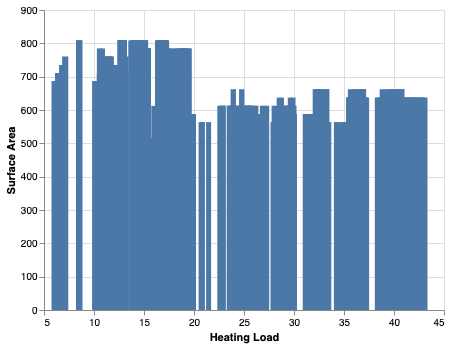

In [5]:
alt.Chart(df2).mark_bar().encode(
    x='Heating Load:Q',
    y='Surface Area:Q'
)

In [6]:
source = df2

highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

base = alt.Chart(source).encode(
    x='Surface Area:Q',
    y='Heating Load:Q',
    color='Orentation'
)

points = base.mark_point().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=600
)

lines = base.mark_bar().encode(
    size=alt.condition(highlight, alt.value(3), alt.value(1))
)

points + lines

ValueError: Orentation encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.LayerChart(...)

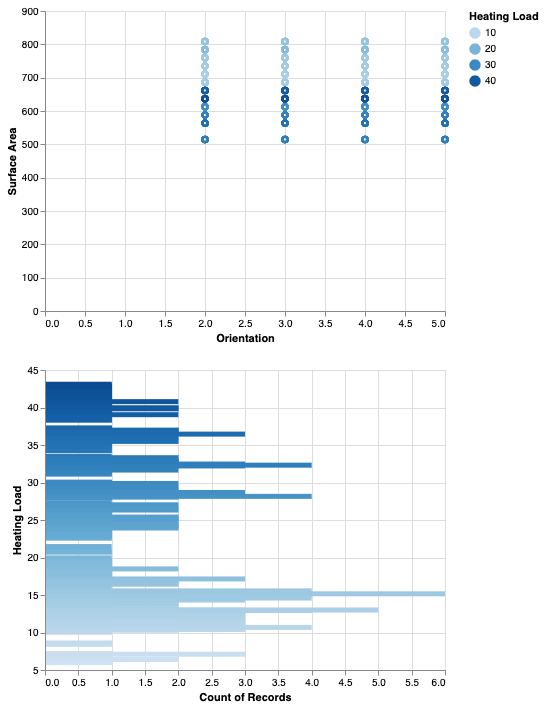

In [7]:
     

source = df2

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Orientation:Q',
    y='Surface Area:Q',
    color=alt.condition(brush, 
                        'Heating Load:Q',
                        alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Heating Load:Q',
    color='Heating Load:Q',
    x='count()'
).transform_filter(
    brush
)

alt.vconcat(points, bars)

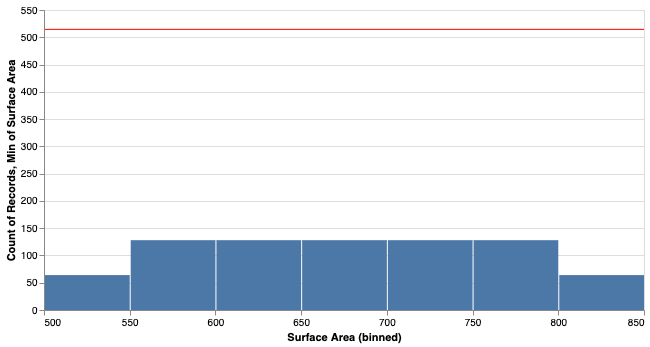

In [8]:
bars = alt.Chart(df2).mark_bar().encode(
    alt.X('Surface Area', bin=True),
    y='count()'
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    y='min(Surface Area)'
)

(bars + rule).properties(width=600)

In [9]:
rule = alt.Chart(source).mark_rule(color='red').encode(
    y='count()'
)

In [10]:
bars = alt.Chart(df2).mark_bar().encode(
    alt.X('Glazing Area Distribution', bin=True),
    y='count()'
)

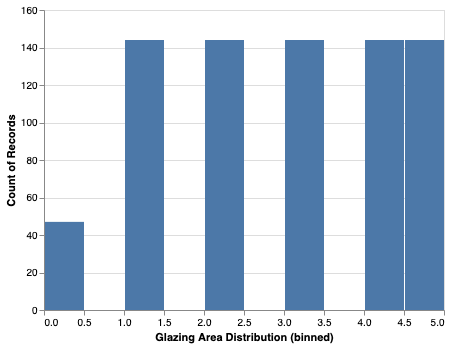

In [11]:
bars

In [12]:
bars = alt.Chart(df2).mark_bar().encode(
    alt.X('Heating Load', bin=True),
    y='count()'
)

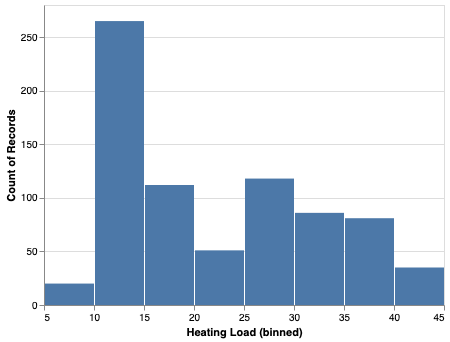

In [13]:
bars

In [14]:
df3 = pd.read_csv('wine.data', names=['CLASS','A', 'MA', 'ASH', 'AoA', 'M', 'TP', 'F', 'NP', 'P', 'CI', 'H', 'DIW', 'PRO']) #names=['Class','STABILITY','ERROR','SIGN','WIND', 'MAGNITUDE', 'VISIBILITY']

In [15]:
df3

,CLASS,A,MA,ASH,AoA,M,TP,F,NP,P,CI,H,DIW,PRO
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


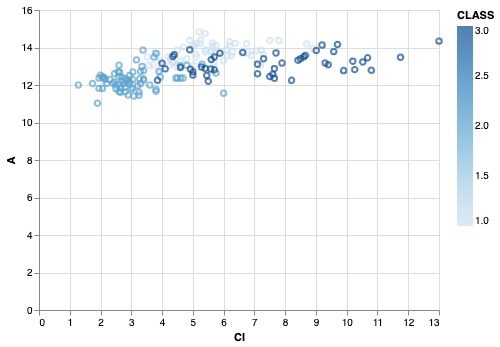

In [16]:
alt.Chart(df3).mark_point().encode(
    x='CI:Q',
    y='A:Q',
    #size='count()',
    color='CLASS',
)

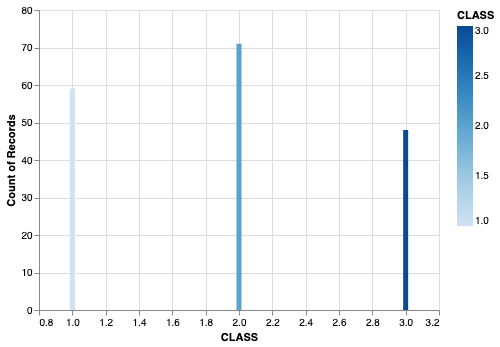

In [17]:
alt.Chart(df3).mark_bar().encode(
    x='CLASS',
    y='count()',
    #size='count()',
    color='CLASS',
)

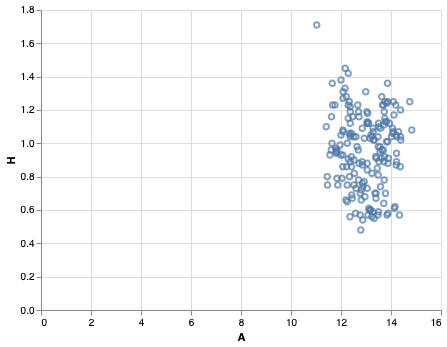

In [18]:
alt.Chart(df3).mark_point().encode(
    x='A:Q',
    y='H:Q'
)

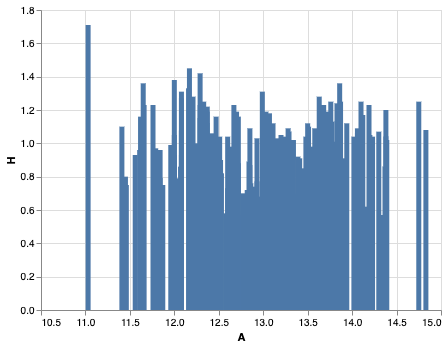

In [19]:
alt.Chart(df3).mark_bar().encode(
    x='A:Q',
    y='H:Q'
)

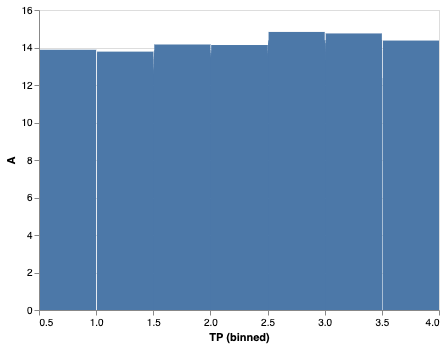

In [20]:
alt.Chart(df3).mark_bar().encode(
    alt.X('TP:Q', bin=True),
    y='A:Q'
)



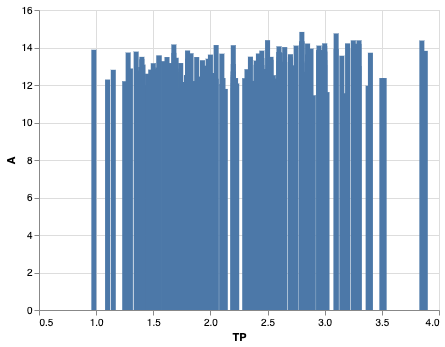

In [21]:
alt.Chart(df3).mark_bar().encode(
    alt.X('TP:Q', bin=False),
    y='A:Q'
)

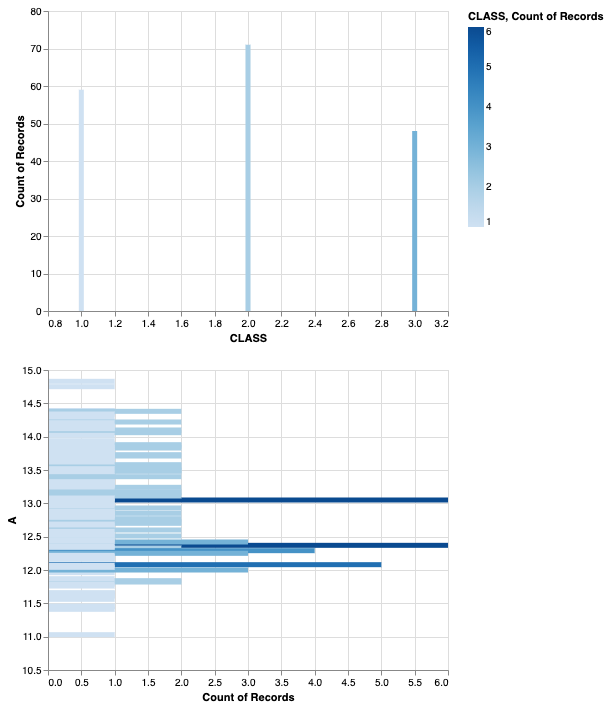

In [22]:
source = df3

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_bar().encode(
    x='CLASS:Q',
    y='count()',
    color=alt.condition(brush, 
                        'CLASS:Q',
                        alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='A:Q',
    color='count()',
    x='count()'
).transform_filter(
    brush
)

alt.vconcat(points, bars)

In [23]:
df5 = pd.read_excel('Real estate valuation data set.xlsx') #names=['Transaction Date','House Age','Nearest MRT Station','Convience Stores','Latitude', 'Longatude', 'House Price'] 
df5 = pd.read_excel('Real estate valuation data set.xlsx')
df5

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [27]:
alt.Chart(df5).mark_bar().encode(
    x='X2 house age',
    y='Y house price of unit area',
    color= 'red'#alt.condition(
        #alt.datum.'Y house price of unit area'.value > 60,
        #alt.value('orange'),    # If statment is true, the bar will be orange.
        #alt.value('steelblue')  # If statment not true, bar will be set to blue.

    )
).properties(width=600)

SyntaxError: invalid syntax (<ipython-input-27-56b413b60df8>, line 10)

In [ ]:
brush = alt.selection_interval()

alt.Chart(df5).mark_point().encode(
    x='X2 house age',
    y='Y house price of unit area',
    color=alt.condition(brush, 'Y house price of unit area', alt.value('lightgray')),
).properties(
    selection=brush
).facet(column='X4 number of convenience stores:Q')

In [ ]:
brush = alt.selection(type='interval')

# the top scatterplot
points = alt.Chart().mark_point().encode(
    x='X2 house age:Q',
    y='Y house price of unit area:Q',
    color=alt.condition(brush, 'Y house price of unit area:Q', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='X4 number of convenience stores:Q',
    color='count(Y house price of unit area)',
    x='count(*):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)

bars2 = alt.Chart().mark_bar().encode(
    y='X3 distance to the nearest MRT station:Q',
    color='count(Y house price of unit area)',
    x='count(*):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)

chart = alt.vconcat(points, bars, bars2, data=df5)
chart

In [ ]:
base = alt.Chart(df5).mark_point().encode(
    x='X3 distance to the nearest MRT station:Q',
    y='X4 number of convenience stores:Q'
)

In [ ]:
base